## Cuaderno de Diferencias finitas



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejemplo de polinomio

In [11]:
rng = np.random.RandomState(9)

coeficientes = rng.rand(5)
coeficientes

array([0.01037415, 0.50187459, 0.49577329, 0.13382953, 0.14211109])

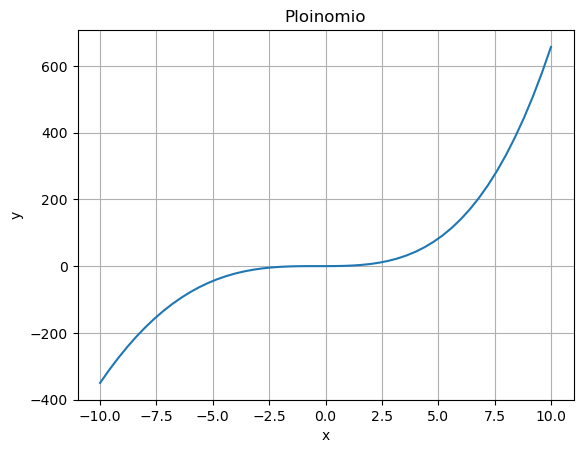

In [25]:
x = np.linspace(-10, 10, 51)  # Rango de valores de x
#x = np.linspace(-2, 2, 51)  # Rango de valores de x  (ZOOM)

y = np.polyval(coeficientes, x)
#y = np.polyval([3,2,1], x)

point_x = 2.5
point_y = np.polyval(coeficientes, point_x)

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ploinomio')
plt.grid(True)
plt.show()


Calculamos la derivada

In [26]:
coeficientes_derivada = np.polyder(coeficientes)
coeficientes_derivada

array([0.04149662, 1.50562378, 0.99154659, 0.13382953])

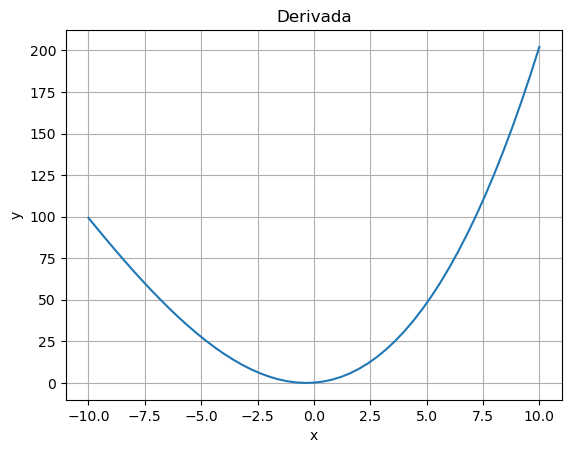

In [27]:
y_prima = np.polyval(coeficientes_derivada, x)

plt.plot(x, y_prima)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Derivada')
plt.grid(True)
plt.show()

Calculamos en diferencias finitas

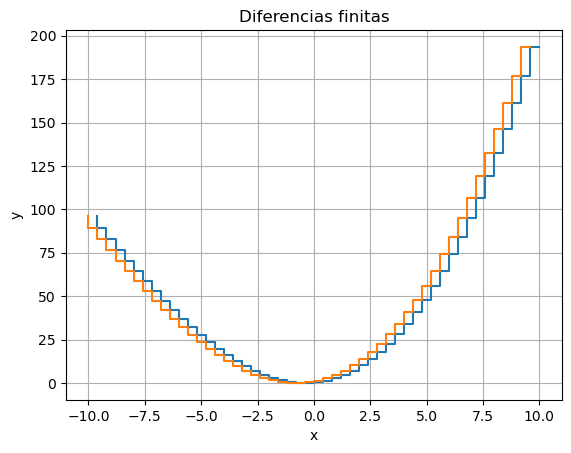

In [29]:
y_diferencias_finitas = np.diff(y)/np.diff(x)
# Al restar diferencias y tiene un valor menos, en x podemos ignorar el primer valor
# o ignorar el último valor
plt.step(x[1:], y_diferencias_finitas) 
plt.step(x[:-1], y_diferencias_finitas)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Diferencias finitas')
plt.grid(True)
plt.show()

### Derivas de orden superior

In [30]:
coeficientes_derivada_o2 = np.polyder(coeficientes_derivada)
coeficientes_derivada_o2

array([0.12448985, 3.01124755, 0.99154659])

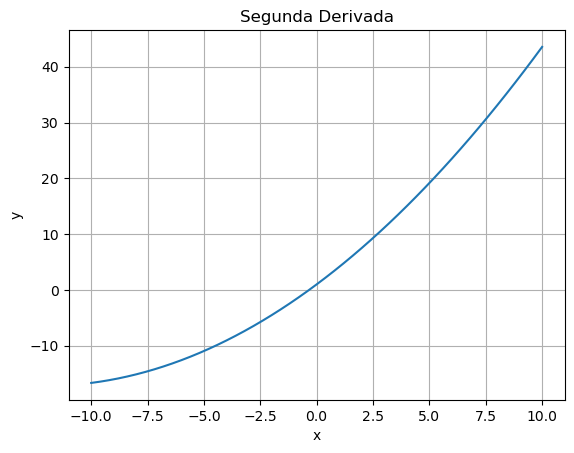

In [31]:
y_prima_prima = np.polyval(coeficientes_derivada_o2, x)

plt.plot(x, y_prima_prima)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Segunda Derivada')
plt.grid(True)
plt.show()

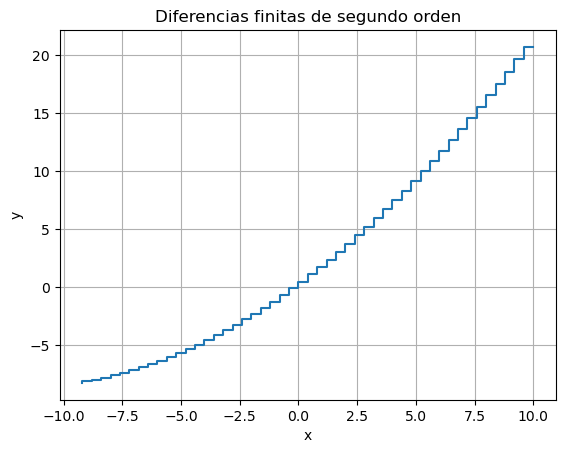

In [32]:
# La diferencia de xo a x1 es dos veces de x0 a x2
y_diferencias_finitas_o2 = np.diff(y_diferencias_finitas)/(np.diff(x[1:])*2)

plt.step(x[2:], y_diferencias_finitas_o2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Diferencias finitas de segundo orden')
plt.grid(True)
plt.show()

## Diferencias centrales

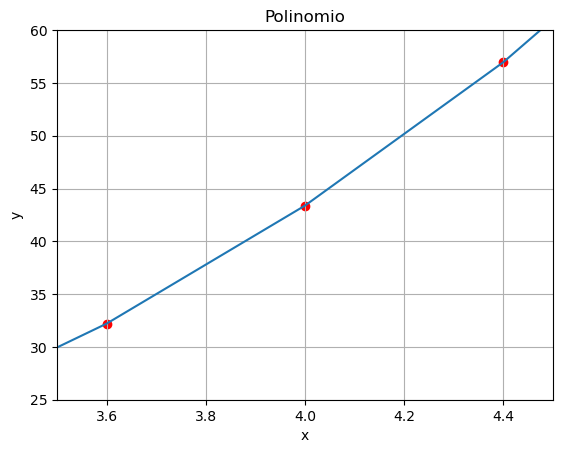

In [33]:
plt.plot(x,y)

plt.scatter(x,y, color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polinomio')
plt.grid(True)
plt.xlim((3.5,4.5))
plt.ylim((25,60))

plt.show()

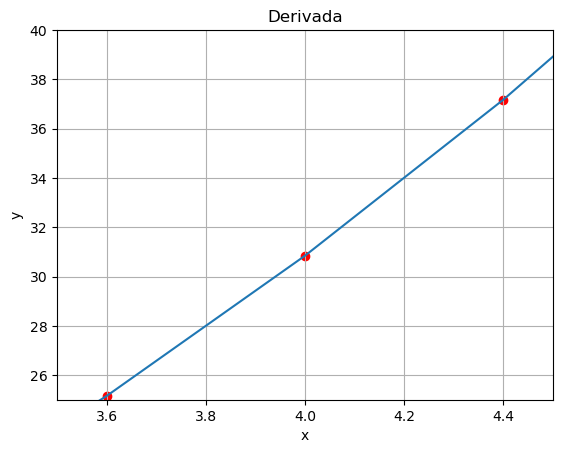

In [34]:
plt.plot(x,y_prima)

plt.scatter(x,y_prima, color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Derivada')
plt.grid(True)
plt.xlim((3.5,4.5))
plt.ylim((25,40))

plt.show()

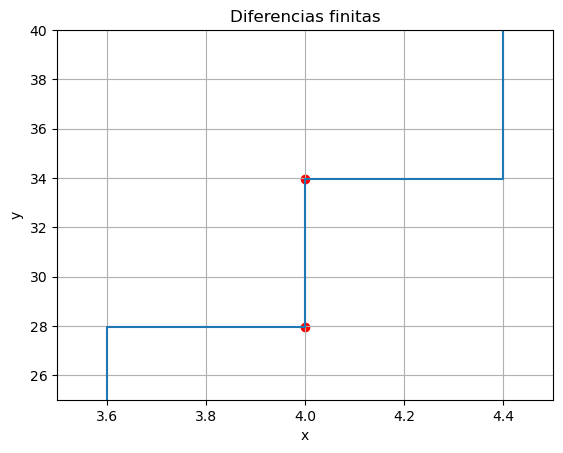

In [35]:
#plt.plot(x,y_prima, color='black')
plt.step(x[1:], y_diferencias_finitas)

plt.scatter([x[35],x[35]],[y_diferencias_finitas[35],y_diferencias_finitas[34]], color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Diferencias finitas')
plt.grid(True)
plt.xlim((3.5,4.5))
plt.ylim((25,40))

plt.show()

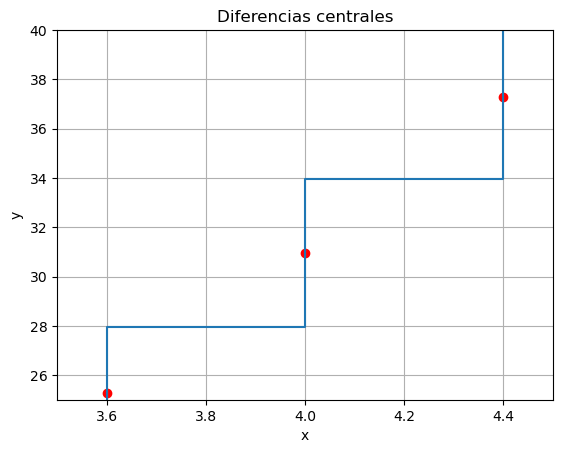

In [37]:
y_diferencias_centrales = (y[2:]-y[:-2]) / (x[2:]-x[:-2])

plt.step(x[1:], y_diferencias_finitas)
plt.scatter(x[1:-1], y_diferencias_centrales, color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Diferencias centrales')
plt.grid(True)
plt.xlim((3.5,4.5))
plt.ylim((25,40))

plt.show()

## Tamaño espacio

Vamos a experimentar con el tamaño del espacio

In [38]:
tamanio_espacios = [10**(-x) for x in range(20)]
tamanio_espacios

[1,
 0.1,
 0.01,
 0.001,
 0.0001,
 1e-05,
 1e-06,
 1e-07,
 1e-08,
 1e-09,
 1e-10,
 1e-11,
 1e-12,
 1e-13,
 1e-14,
 1e-15,
 1e-16,
 1e-17,
 1e-18,
 1e-19]

In [39]:
x0 = 5

In [40]:
y0 = np.polyval(coeficientes, x0)
y0

82.42376125575939

In [41]:
# Valor real 
y0_prima = np.polyval(coeficientes_derivada, x0)
y0_prima

47.91923381430612

In [43]:
# Aproximación cambiando tamaño de espacio hasta que hay error de precisión
for h in tamanio_espacios:
  diferencia_finita = (np.polyval(coeficientes, x0+h) -y0 )/ h
  print(f"Valor de la diferencia finita para espacio de {h} : {diferencia_finita}")

Valor de la diferencia finita para espacio de 1 : 58.21898089627476
Valor de la diferencia finita para espacio de 0.1 : 48.88433929098056
Valor de la diferencia finita para espacio de 0.01 : 48.015104913028495
Valor de la diferencia finita para espacio de 0.001 : 47.92881453896314
Valor de la diferencia finita para espacio de 0.0001 : 47.92019182289664
Valor de la diferencia finita para espacio de 1e-05 : 47.91932961154543
Valor de la diferencia finita para espacio de 1e-06 : 47.91924339997422
Valor de la diferencia finita para espacio de 1e-07 : 47.91923501556994
Valor de la diferencia finita para espacio de 1e-08 : 47.919233736593014
Valor de la diferencia finita para espacio de 1e-09 : 47.9192294733366
Valor de la diferencia finita para espacio de 1e-10 : 47.91914420820831
Valor de la diferencia finita para espacio de 1e-11 : 47.91900209966116
Valor de la diferencia finita para espacio de 1e-12 : 47.91900209966116
Valor de la diferencia finita para espacio de 1e-13 : 47.890580390230

## Descenso gradiente

In [44]:
rng = np.random.RandomState(123456)

coeficientes = rng.rand(3)

coeficientes_derivada = np.polyder(coeficientes)
raices = np.roots(coeficientes_derivada)

print(coeficientes,coeficientes_derivada,raices,sep="\n")

[0.12696983 0.96671784 0.26047601]
[0.25393967 0.96671784]
[-3.80688001]


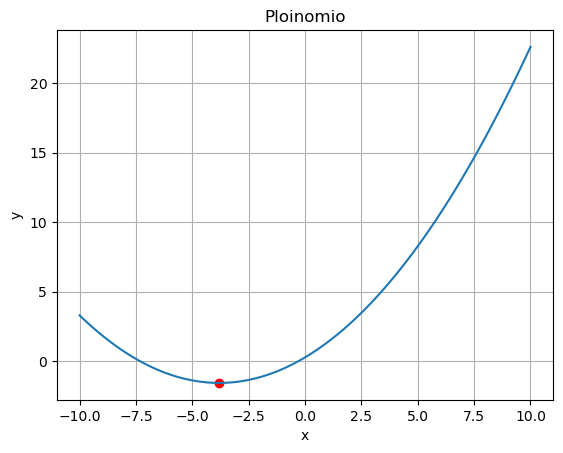

In [45]:
x = np.linspace(-10, 10, 100)  # Rango de valores de x
x_min = raices[0]

y = np.polyval(coeficientes, x)
y_min = np.polyval(coeficientes, x_min)

plt.plot(x, y)
plt.scatter(x_min,y_min,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ploinomio')
plt.grid(True)
plt.show()

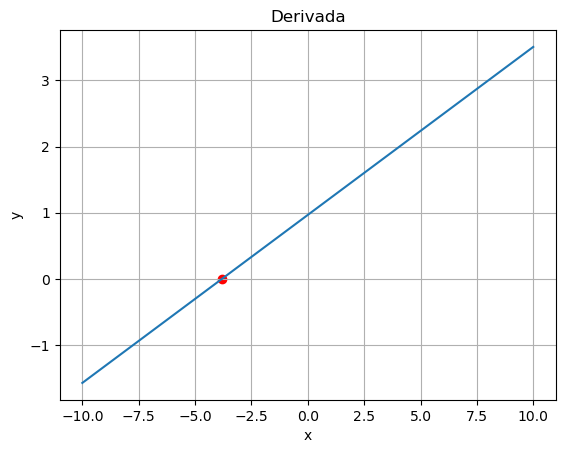

In [46]:
y_prima = np.polyval(coeficientes_derivada, x)
y_min_prima = np.polyval(coeficientes_derivada, x_min)


plt.plot(x, y_prima)
plt.scatter(x_min,y_min_prima,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Derivada')
plt.grid(True)
plt.show()

In [47]:
raices

array([-3.80688001])

In [48]:
tamanio_paso = 1

In [52]:
pasos = [10]
xi = pasos[0]
for i in range(20):
  derivada = np.polyval(coeficientes_derivada, xi)
  xi -= tamanio_paso * derivada
  pasos.append(xi)
  print(f"Gradiente:{derivada}\nx_{i+1}={xi}")


Gradiente:3.506114499244022
x_1=6.493885500755978
Gradiente:2.615772954081065
x_2=3.8781125466749127
Gradiente:1.9515244435905592
x_3=1.9265881030843535
Gradiente:1.455954978045627
x_4=0.47063312503872656
Gradiente:1.0862302570987366
x_5=-0.61559713206001
Gradiente:0.8103933083292165
x_6=-1.4259904403892265
Gradiente:0.6046023022217067
x_7=-2.030592742610933
Gradiente:0.4510697954866236
x_8=-2.4816625380975568
Gradiente:0.3365252822436898
x_9=-2.8181878203412465
Gradiente:0.2510681644445276
x_10=-3.069255984785774
Gradiente:0.18731199860311942
x_11=-3.2565679833888934
Gradiente:0.13974605222577718
x_12=-3.3963140356146706
Gradiente:0.10425898638809594
x_13=-3.5005730220027664
Gradiente:0.07778349419925956
x_14=-3.578356516202026
Gradiente:0.05803117965605942
x_15=-3.6363876958580854
Gradiente:0.04329476127219156
x_16=-3.679682457130277
Gradiente:0.03230050405188245
x_17=-3.7119829611821595
Gradiente:0.024098124838854318
x_18=-3.736081086021014
Gradiente:0.017978655064213034
x_19=-3.754

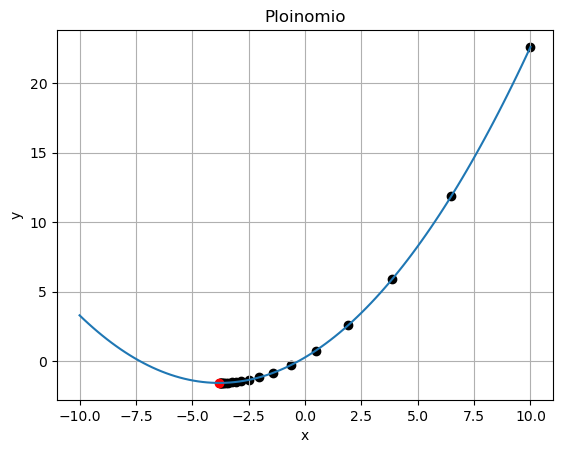

In [53]:
x = np.linspace(-10, 10, 100)  # Rango de valores de x
x_min = raices[0]

y = np.polyval(coeficientes, x)
y_min = np.polyval(coeficientes, x_min)
y_pasos = np.polyval(coeficientes, pasos)

plt.plot(x, y)
plt.scatter(pasos,y_pasos,color="black")
plt.scatter(x_min,y_min,color="red")


plt.xlabel('x')
plt.ylabel('y')
plt.title('Ploinomio')
plt.grid(True)
plt.show()

### Descenso de gradiente multivariable

In [55]:
def f(x, y):
  return 4*x**2 + y**2 - 2

def grad_f(x,y):
  # Derivada de f(x,y)
  return np.array([8*x, 2*y])

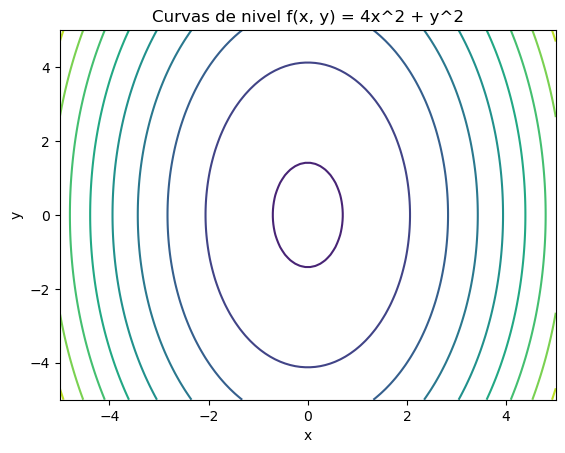

In [56]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values for each (x, y) point
Z = f(X, Y)

# Plot the level curves
plt.contour(X, Y, Z, levels=10)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel f(x, y) = 4x^2 + y^2')

# Show the plot
plt.show()

In [57]:
def descenso_gradiente(gradiente,tamanio_paso,x0,iteraciones):
  pasos = [x0.copy()]
  xi = x0
  for i in range(iteraciones):
    derivada = gradiente(*xi)
    xi -= tamanio_paso * derivada
    pasos.append(xi.copy())
    print(f"Gradiente:{derivada}\nx_{i+1}={xi}")
  return pasos


In [59]:
pasos = descenso_gradiente(
    grad_f,
    0.15,
    np.array([7,7],dtype=float),
    10)
pasos

Gradiente:[56. 14.]
x_1=[-1.4  4.9]
Gradiente:[-11.2   9.8]
x_2=[0.28 3.43]
Gradiente:[2.24 6.86]
x_3=[-0.056  2.401]
Gradiente:[-0.448  4.802]
x_4=[0.0112 1.6807]
Gradiente:[0.0896 3.3614]
x_5=[-0.00224  1.17649]
Gradiente:[-0.01792  2.35298]
x_6=[4.48000e-04 8.23543e-01]
Gradiente:[0.003584 1.647086]
x_7=[-8.960000e-05  5.764801e-01]
Gradiente:[-7.1680000e-04  1.1529602e+00]
x_8=[1.7920000e-05 4.0353607e-01]
Gradiente:[1.4336000e-04 8.0707214e-01]
x_9=[-3.58400000e-06  2.82475249e-01]
Gradiente:[-2.86720000e-05  5.64950498e-01]
x_10=[7.16800000e-07 1.97732674e-01]


[array([7., 7.]),
 array([-1.4,  4.9]),
 array([0.28, 3.43]),
 array([-0.056,  2.401]),
 array([0.0112, 1.6807]),
 array([-0.00224,  1.17649]),
 array([4.48000e-04, 8.23543e-01]),
 array([-8.960000e-05,  5.764801e-01]),
 array([1.7920000e-05, 4.0353607e-01]),
 array([-3.58400000e-06,  2.82475249e-01]),
 array([7.16800000e-07, 1.97732674e-01])]

In [60]:
pasos_x = [x[0] for x in pasos]
pasos_y = [x[1] for x in pasos]

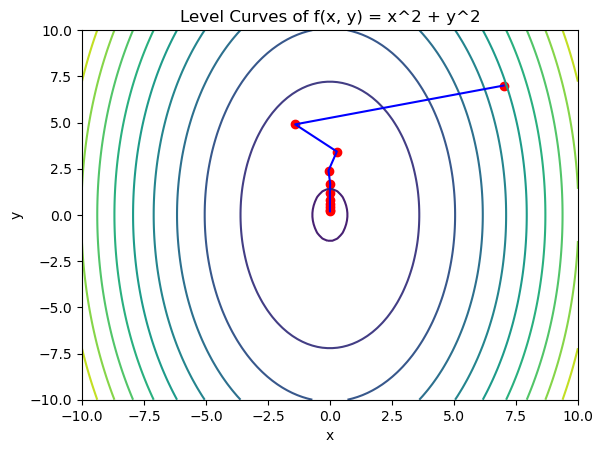

In [61]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values for each (x, y) point
Z = f(X, Y)

# Plot the level curves
plt.contour(X, Y, Z, levels=10)
plt.plot(pasos_x,pasos_y,color="blue")
plt.scatter(pasos_x,pasos_y,color="red")


# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Level Curves of f(x, y) = x^2 + y^2')

# Show the plot
plt.show()

Ejercicio:

resuelve ahora calculando el numérico